In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
data=pd.read_csv('Restaurants.csv')

In [22]:
data.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Average_Bill
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000


In [23]:
data.shape

(6593, 8)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6593 non-null   object 
 1   Location      6593 non-null   object 
 2   Locality      6593 non-null   object 
 3   City          6593 non-null   object 
 4   Cuisine       6593 non-null   object 
 5   Rating        6593 non-null   float64
 6   Votes         6593 non-null   int64  
 7   Average_Bill  6593 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 412.2+ KB


In [25]:
data.describe()

,Rating,Votes,Average_Bill
count,6593.000000,6593.000000,6593.000000
mean,4.088200,119.420143,1102.798271
std,0.670031,261.849704,716.935212
min,1.000000,1.000000,100.000000
25%,3.900000,6.000000,500.000000
50%,4.200000,31.000000,900.000000
75%,4.400000,115.000000,1500.000000
max,5.000000,5016.000000,8000.000000


In [26]:
data[data['City'].str.contains('Delhi')]['Location'].count()

734

In [27]:
data.groupby('City')['Rating'].mean().head(10).sort_values(ascending=False)

City
Gurgaon       4.308696
Agra          4.238667
Ahmedabad     4.202899
Delhi         4.176567
Goa           4.153333
Chandigarh    4.137500
Ghaziabad     4.086000
Hyderabad     4.040917
Bangalore     4.029931
Chennai       4.025258
Name: Rating, dtype: float64

In [28]:
def Rating_Type(Rating):
    if Rating<3.0:
        return "Poor Rating"
    if Rating<4.0:
        return "Fair Rating"
    if Rating<4.5:
        return "Good Rating"
    else:
        return "Excellent Rating"

In [29]:
data['Rating_Description']=data['Rating'].apply(Rating_Type)

In [30]:
data.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Average_Bill,Rating_Description
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000,Good Rating
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500,Good Rating
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000,Good Rating
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800,Good Rating
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000,Good Rating


In [31]:
data1=data[data['City'].str.contains('Bangalore')]['Rating_Description'].value_counts()


In [32]:
data1

Good Rating         452
Excellent Rating    274
Fair Rating         221
Poor Rating          72
Name: Rating_Description, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

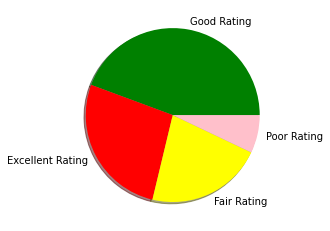

In [33]:
my_labels=['Good Rating','Excellent Rating','Fair Rating','Poor Rating']
Values=[452,274,221,72]
plt.pie(Values,labels=my_labels,startangle=0,shadow=True,colors=["Green","Red","Yellow","Pink"])
plt.show

In [34]:
list1=[]
for value in data['Cuisine']:
    list1.append(value.split(','))

In [35]:
data['temp']=list1

In [36]:
cuisine=input("Enter Cuisine you want to count : ").title()
count=0
for value in data['temp']:
    if cuisine in value:
        count=count+1
print("Total Count is",count)

Enter Cuisine you want to count : North Indian
Total Count is 2228


In [41]:
data2=data[data['City']=='Hyderabad'][['Locality','Average_Bill']]

In [42]:
data2

,Locality,Average_Bill
3245,Central East Hyderabad,1200
3246,Secunderabad,1100
3247,Central West Hyderabad,1200
3248,Central West Hyderabad,1600
3249,Central East Hyderabad,1000
...,...,...
3829,South Hyderabad,1100
3830,West Hyderabad,1000
3831,Secunderabad,1000
3832,West Hyderabad,1000


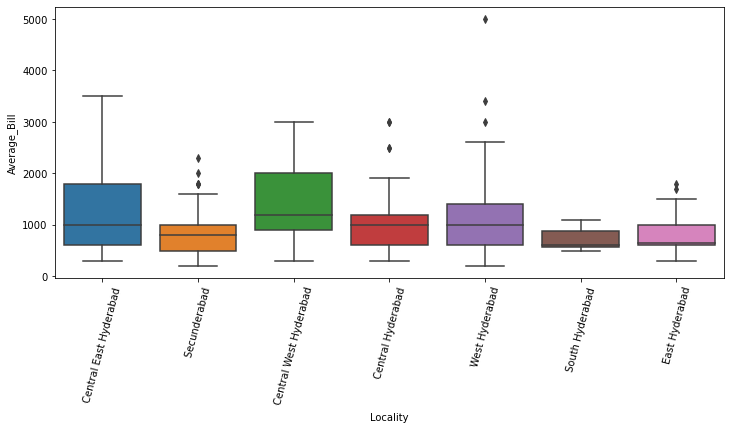

In [47]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Locality',y='Average_Bill',data=data2)
plt.show
plt.xticks(rotation=75)
plt.show()

In [66]:
data3=data.nlargest(10,'Average_Bill')[['Name','Location','Average_Bill']]

In [67]:
data3

,Name,Location,Average_Bill
1672,Masque,"Laxmi Woolen Mills,Mahalaxmi, South Mumbai",8000
632,Kheer,"Roseate House,Aerocity, South Delhi",6000
119,Sevilla,"The Claridges,Aurangzeb Road, Central Delhi",5000
199,Le Cirque,"The Leela Palace,Chanakyapuri, South Delhi",5000
202,The Qube,"The Leela Palace,Chanakyapuri, South Delhi",5000
215,Megu,"The Leela Palace,Chanakyapuri, South Delhi",5000
467,Del,"Roseate House,Aerocity, South Delhi",5000
805,Chi Ni,"The Roseate,Samalkha, South Delhi",5000
944,Seasonal Tastes,"The Westin Hotel,Sector 29, Gurgaon",5000
1223,Masala Library by Jiggs Kalra,"FIFC Building,Bandra Kurla Complex, Bandra",5000


In [68]:
data3['substring'] = data3['Location'].str.split(',').str[2]

In [69]:
data3

,Name,Location,Average_Bill,substring
1672,Masque,"Laxmi Woolen Mills,Mahalaxmi, South Mumbai",8000,South Mumbai
632,Kheer,"Roseate House,Aerocity, South Delhi",6000,South Delhi
119,Sevilla,"The Claridges,Aurangzeb Road, Central Delhi",5000,Central Delhi
199,Le Cirque,"The Leela Palace,Chanakyapuri, South Delhi",5000,South Delhi
202,The Qube,"The Leela Palace,Chanakyapuri, South Delhi",5000,South Delhi
215,Megu,"The Leela Palace,Chanakyapuri, South Delhi",5000,South Delhi
467,Del,"Roseate House,Aerocity, South Delhi",5000,South Delhi
805,Chi Ni,"The Roseate,Samalkha, South Delhi",5000,South Delhi
944,Seasonal Tastes,"The Westin Hotel,Sector 29, Gurgaon",5000,Gurgaon
1223,Masala Library by Jiggs Kalra,"FIFC Building,Bandra Kurla Complex, Bandra",5000,Bandra


In [70]:
data3['Full_Address']=data3['Name'] + ',' + data3['substring']

In [71]:
data3

,Name,Location,Average_Bill,substring,Full_Address
1672,Masque,"Laxmi Woolen Mills,Mahalaxmi, South Mumbai",8000,South Mumbai,"Masque, South Mumbai"
632,Kheer,"Roseate House,Aerocity, South Delhi",6000,South Delhi,"Kheer, South Delhi"
119,Sevilla,"The Claridges,Aurangzeb Road, Central Delhi",5000,Central Delhi,"Sevilla, Central Delhi"
199,Le Cirque,"The Leela Palace,Chanakyapuri, South Delhi",5000,South Delhi,"Le Cirque, South Delhi"
202,The Qube,"The Leela Palace,Chanakyapuri, South Delhi",5000,South Delhi,"The Qube, South Delhi"
215,Megu,"The Leela Palace,Chanakyapuri, South Delhi",5000,South Delhi,"Megu, South Delhi"
467,Del,"Roseate House,Aerocity, South Delhi",5000,South Delhi,"Del, South Delhi"
805,Chi Ni,"The Roseate,Samalkha, South Delhi",5000,South Delhi,"Chi Ni, South Delhi"
944,Seasonal Tastes,"The Westin Hotel,Sector 29, Gurgaon",5000,Gurgaon,"Seasonal Tastes, Gurgaon"
1223,Masala Library by Jiggs Kalra,"FIFC Building,Bandra Kurla Complex, Bandra",5000,Bandra,"Masala Library by Jiggs Kalra, Bandra"


In [83]:
data3.drop(['Name','substring','Location'],axis=1).set_index('Full_Address',inplace=False)

,Average_Bill
Full_Address,
"Masque, South Mumbai",8000
"Kheer, South Delhi",6000
"Sevilla, Central Delhi",5000
"Le Cirque, South Delhi",5000
"The Qube, South Delhi",5000
"Megu, South Delhi",5000
"Del, South Delhi",5000
"Chi Ni, South Delhi",5000
"Seasonal Tastes, Gurgaon",5000


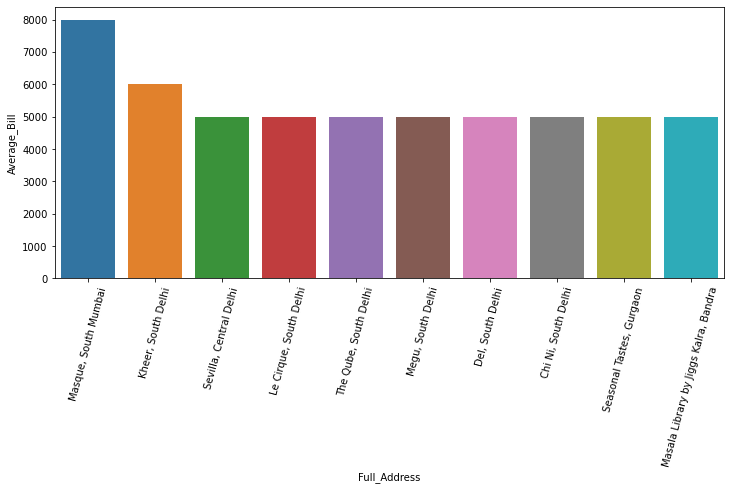

In [98]:
plt.figure(figsize=(12,5))
sns.barplot(x='Full_Address',y='Average_Bill',data=data3)
plt.xticks(rotation=75)
plt.show()

In [90]:
data.corr()

,Rating,Votes,Average_Bill
Rating,1.000000,0.094213,0.149745
Votes,0.094213,1.000000,0.311000
Average_Bill,0.149745,0.311000,1.000000


In [114]:
data
data4=data[data['City']=='Mumbai'][['Locality','Rating','Average_Bill']]

In [115]:
data4.set_index('Locality')

,Rating,Average_Bill
Locality,,
Central Suburbs,4.3,2000
Andheri East,4.5,2000
Central Suburbs,4.7,1100
Powai,5.0,900
Powai,4.5,1400
...,...,...
North Western,4.0,1200
North Western,4.1,1500
24 Parganas South,3.1,400


Text(0.5, 1.1, 'Relationship between Average_Price and Ratings in Mumbai')

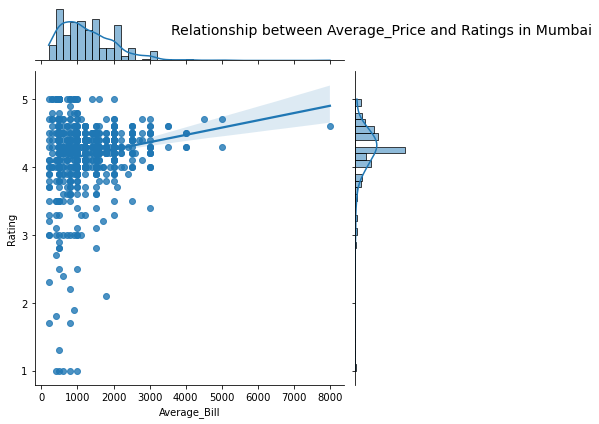

In [122]:
sns.jointplot(x='Average_Bill',y='Rating',data=data4,kind='reg')
plt.title('Relationship between Average_Price and Ratings in Mumbai',y=1.1,fontsize=14)

In [151]:
data5=data[(data['Location']=='Connaught Place, Central Delhi') & (data['Votes']>1500)].sort_values(by='Average_Bill',ascending=True)

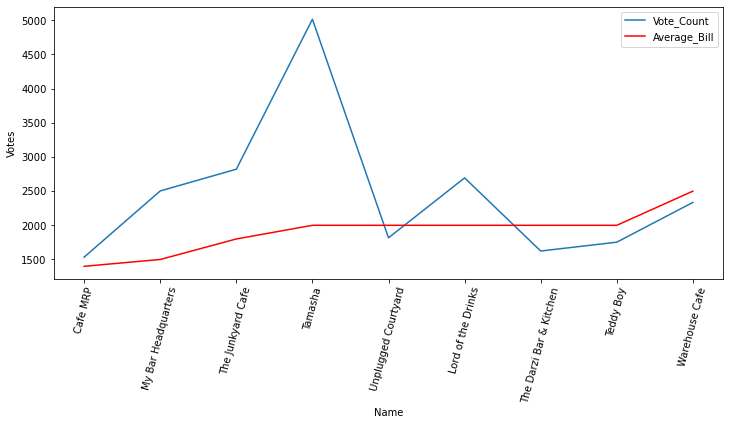

In [153]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Name',y='Votes',data=data5,label='Vote_Count')
sns.lineplot(x='Name',y='Average_Bill', data=data5, label='Average_Bill',color='red')
plt.xticks(rotation=75)
plt.show()
